### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [738]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [739]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [740]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [741]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 15
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [742]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 317,1614,0,13.965000,10.240000,0.130860,-0.417300,0.467388,0.000000

Rx: 4172,0,0,13.986000,10.240000,0.087240,-0.264290,0.467388,-0.000003

Rx: 8175,0,0,13.923000,10.240000,0.189020,-0.389480,0.467388,-0.000003

Rx: 12173,0,0,13.944000,10.240000,0.043620,-0.333840,0.467388,0.000000

Rx: 16171,0,0,13.986000,10.240000,0.159940,-0.236470,0.467388,0.000000

Rx: 20178,0,0,13.965000,10.240000,0.130860,-0.333840,0.467388,-0.000003

Rx: 24171,0,0,13.923000,10.240000

In [660]:
test_directory = Path("../test_data/fine_single_prop/")

In [743]:
data_dict = {}
files = [
    ### TOP PROPELLER TESTS ###
    "test_open_single_top_pb_0.csv",
    "test_open_single_top_pb_1.csv",
 
    # "test_1mm_single_top_pb_0.csv",
    # "test_1mm_single_top_pb_1.csv",
    # "test_1mm_single_top_pb_2.csv",
    
    "test_0.5mm_single_top_pb_0.csv",
    "test_0.5mm_single_top_pb_1.csv",

    # "test_0.6mm_single_top_pb_0.csv",
    # "test_0.6mm_single_top_pb_1.csv",
    # "test_0.6mm_single_top_pb_2.csv",
    # "test_0.6mm_single_top_pb_3.csv",

    # "test_0.7mm_single_top_pb_0.csv",
    # "test_0.7mm_single_top_pb_1.csv",
    # "test_0.7mm_single_top_pb_2.csv",

    # "test_0.3mm_single_top_pb_0.csv",
    # "test_0.3mm_single_top_pb_1.csv",
    # "test_0.3mm_single_top_pb_2.csv",
    # "test_0.3mm_single_top_pb_3.csv",

    # "test_0.4mm_single_top_pb_0.csv",
    # "test_0.4mm_single_top_pb_1.csv",
    # "test_0.4mm_single_top_pb_2.csv",

    # "test_0.2mm_single_top_pb_0.csv",
    "test_0.2mm_single_top_pb_1.csv",
    # "test_0.2mm_single_top_pb_2.csv",
    "test_0.2mm_single_top_pb_3.csv",
    "test_0.2mm_single_top_pb_4.csv",

    ### BOTTOM PROPELLER TESTS ###
    # "test_open_single_bottom_pb_0.csv",
    # "test_open_single_bottom_pb_1.csv",

    # "test_1mm_single_bottom_pb_0.csv",
    # "test_1mm_single_bottom_pb_1.csv",
    # "test_1mm_single_bottom_pb_2.csv",

    # "test_0.5mm_single_bottom_pb_0.csv",
    # "test_0.5mm_single_bottom_pb_1.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: Invalid command: 80300,,0,0

Arming...
FAIL Rx: Invalid command: 81560,21,,0

Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 359,1142,0,13.986000,10.240000,0.130860,-0.292110,0.462249,0.000000

Rx: 4172,0,0,13.944000,10.240000,0.072700,-0.264290,0.462249,0.000000

Rx: 8175,0,0,13.965000,10.240000,0.043620,-0.111280,0.462249,0.000000

Rx: 12174,0,0,13.965000,10.240000,0.101780,-0.264290,0.462249,-0.

### Data Analysis

In [744]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else 0.0 #'Open Air'
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  \
test_name                      tip_clearance_mm time_ms                    
test_0.2mm_single_top_pb_1.csv 0.2              0.359             1128.0   
                                                4.172                0.0   
                                                8.171                0.0   
                                                12.178               0.0   
                                                16.171               0.0   
...                                                                  ...   
test_open_single_top_pb_1.csv  0.0              81968.175         1242.0   
                                                81972.167         1257.0   
                                                81976.175         1214.0   
                                                81980.171         1128.0   
                                                81984.171         1142.0   

                                                           bottom_motor_rpm  \
test_name                      tip_clearance_mm time_ms                       
test_0.2mm_single_top_pb_1.csv 0.2              0.359                   0.0   
                                                4.172                   0.0   
                                                8.171                   0.0   
                                                12.178                  0.0   
                                                16.171                  0.0   
...                                                                     ...   
test_open_single_top_pb_1.csv  0.0              81968.175               0.0   
                                                81972.167               0.0   
                                                81976.175               0.0   
                                                81980.171               0.0   
                                                81984.171               0.0   

                                                           batt_voltage_V  \
test_name                      tip_clearance_mm time_ms                     
test_0.2mm_single_top_pb_1.csv 0.2              0.359              13.986   
                                                4.172              13.986   
                                                8.171              13.944   
                                                12.178             13.986   
                                                16.171             13.986   
...                                                                   ...   
test_open_single_top_pb_1.csv  0.0              81968.175          12.747   
                                                81972.167          12.852   
                                                81976.175          12.768   
                                                81980.171          12.810   
                                                81984.171          12.789   

                                                           batt_current_A  \
test_name                      tip_clearance_mm time_ms                     
test_0.2mm_single_top_pb_1.csv 0.2              0.359               10.24   
                                                4.172               10.24   
                                                8.171               10.24   
                                                12.178              10.24   
                                                16.171              10.24   
...                                                                   ...   
test_open_single_top_pb_1.csv  0.0              81968.175           10.24   
                                                81972.167           10.24   
                                                81976.175           10.24   
                                                81980.171           10.24   
                                                81984.171           10.24   

                                      

In [745]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm  \
                                                                  mean   
test_name                      tip_clearance_mm throttle                 
test_0.2mm_single_top_pb_1.csv 0.2              30           6724.9955   
                                                40           8510.3980   
                                                50          10087.2845   
                                                60          11558.8580   
                                                70          12476.6340   
                                                80          13634.3885   
                                                90          14745.7145   
                                                100         15470.9380   
test_0.2mm_single_top_pb_3.csv 0.2              30           6711.7730   
                                                40           8499.4740   
                                                50          10064.8550   
                                                60          11528.9595   
                                                70          12469.7440   
                                                80          13632.5570   
                                                90          14631.8130   
                                                100         15469.0325   
test_0.2mm_single_top_pb_4.csv 0.2              30           6699.3430   
                                                40           8487.6625   
                                                50          10060.4670   
                                                60          11522.3535   
                                                70          12451.2595   
                                                80          13609.8305   
                                                90          14615.3180   
                                                100         15455.0660   
test_0.5mm_single_top_pb_0.csv 0.5              30           6708.8425   
                                                40           8499.1020   
                                                50          10108.4145   
                                                60          11615.5010   
                                                70          12532.0755   
                                                80          13773.0815   
                                                90          14874.8880   
                                                100         15790.7520   
test_0.5mm_single_top_pb_1.csv 0.5              30           6703.4120   
                                                40           8495.4230   
                                                50          10106.7415   
                                                60          11620.0825   
                                                70          12556.4475   
                                                80          13778.2750   
                                                90          14859.2575   
                                                100         15788.6635   
test_open_single_top_pb_0.csv  0.0              30           6616.2060   
                                                40           8297.2630   
                                                50           9867.1865   
                                                60          11123.4565   
                                                70          12187.5100   
                                                80          13271.6015   
                                                90          14260.3920   
                                                100         15141.8020   
test_open_single_top_pb_1.csv  0.0              30           6588.7940   
                                                40           8299.0865   
                                                50           9858.7125   
                                                60          1

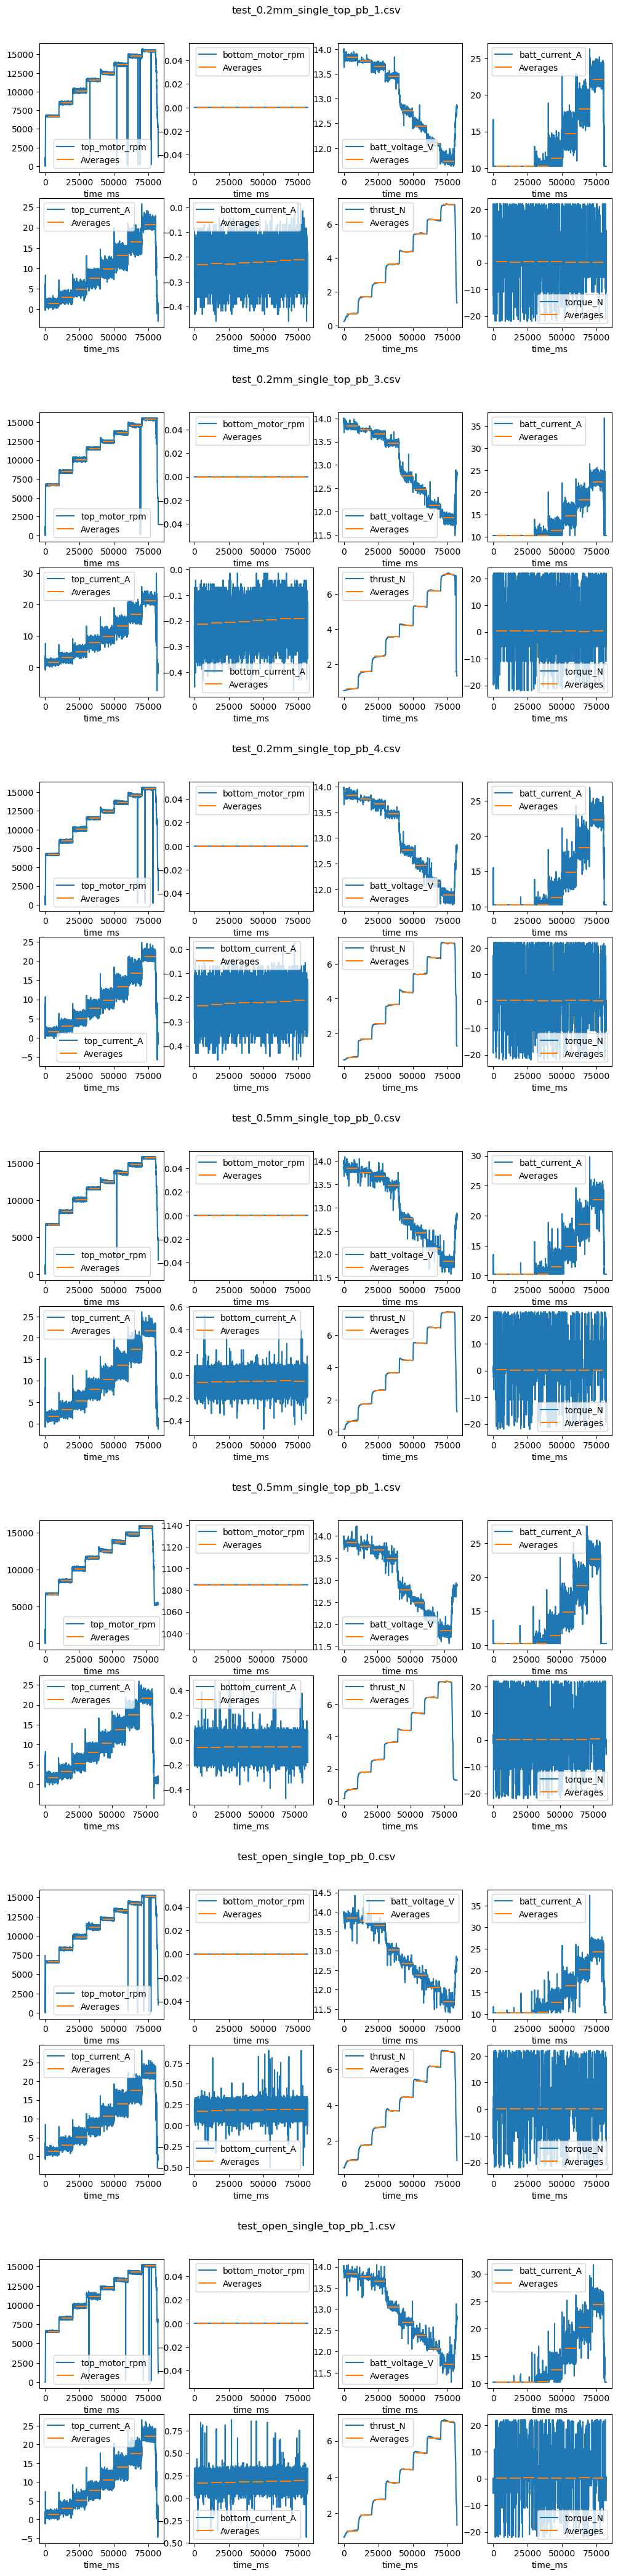

In [746]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index(("test_name", "tip_clearance_mm")).plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [747]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = df_steps["batt_voltage_V"]["std"] / batt_voltage_mean

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "top_rpm": df_steps["top_motor_rpm"]["mean"],
        "bottom_rpm": df_steps["bottom_motor_rpm"]["mean"],
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [748]:
df_thrust_power

rpm_avg  \
test_name                      tip_clearance_mm throttle               
test_0.2mm_single_top_pb_1.csv 0.2              30        3362.49775   
                                                40        4255.19900   
                                                50        5043.64225   
                                                60        5779.42900   
                                                70        6238.31700   
                                                80        6817.19425   
                                                90        7372.85725   
                                                100       7735.46900   
test_0.2mm_single_top_pb_3.csv 0.2              30        3355.88650   
                                                40        4249.73700   
                                                50        5032.42750   
                                                60        5764.47975   
                                                70        6234.87200   
                                                80        6816.27850   
                                                90        7315.90650   
                                                100       7734.51625   
test_0.2mm_single_top_pb_4.csv 0.2              30        3349.67150   
                                                40        4243.83125   
                                                50        5030.23350   
                                                60        5761.17675   
                                                70        6225.62975   
                                                80        6804.91525   
                                                90        7307.65900   
                                                100       7727.53300   
test_0.5mm_single_top_pb_0.csv 0.5              30        3354.42125   
                                                40        4249.55100   
                                                50        5054.20725   
                                                60        5807.75050   
                                                70        6266.03775   
                                                80        6886.54075   
                                                90        7437.44400   
                                                100       7895.37600   
test_0.5mm_single_top_pb_1.csv 0.5              30        3894.20600   
                                                40        4790.21150   
                                                50        5595.87075   
                                                60        6352.54125   
                                                70        6820.72375   
                                                80        7431.63750   
                                                90        7972.12875   
                                                100       8436.83175   
test_open_single_top_pb_0.csv  0.0              30        3308.10300   
                                                40        4148.63150   
                                                50        4933.59325   
                                                60        5561.72825   
                                                70        6093.75500   
                                                80        6635.80075   
                                                90        7130.19600   
                                                100       7570.90100   
test_open_single_top_pb_1.csv  0.0              30        3294.39700   
                                                40        4149.54325   
                                                50        4929.35625   
                                                60        5568.25075   
                                                70        6101.80650   
                                                80        6641.11275   
                             

In [749]:
df_thrust_power_agg = df_thrust_power[(df_thrust_power.index.get_level_values('throttle') >= 60) & (df_thrust_power.index.get_level_values('tip_clearance_mm') > 0)].groupby('tip_clearance_mm').agg('mean')
df_thrust_power_agg

,rpm_avg,top_rpm,bottom_rpm,thrust_mean_g,batt_power_mean,batt_voltage_mean,hall_current_mean,shunt_power_mean,thrust_power_g_W,shunt_thrust_power_g_W,batt_power_err,thrust_g_err,thrust_power_err
tip_clearance_mm,,,,,,,,,,,,,
0.2,6775.748883,13551.497767,0.0,544.764959,166.381001,12.525866,13.488156,190.329688,3.357125,2.867872,8.519357,2.456869,0.187178
0.5,7130.701200,13718.902400,542.5,558.588838,175.126934,12.539481,14.174609,192.901097,3.248169,2.899748,8.735545,1.724423,0.174280


<ErrorbarContainer object of 3 artists>

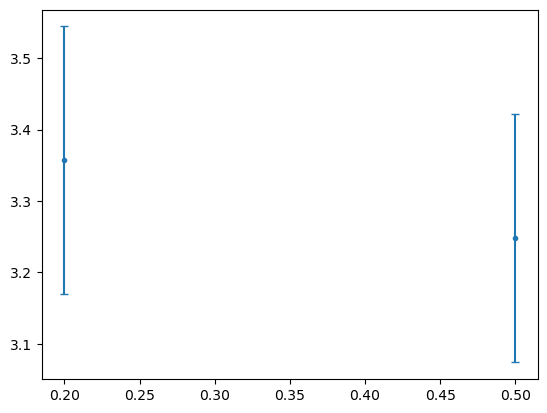

In [750]:
plt.errorbar(x=df_thrust_power_agg.index.get_level_values('tip_clearance_mm'), y="thrust_power_g_W", yerr="thrust_power_err", data=df_thrust_power_agg, fmt='o', capsize=3, markersize=3)

In [751]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

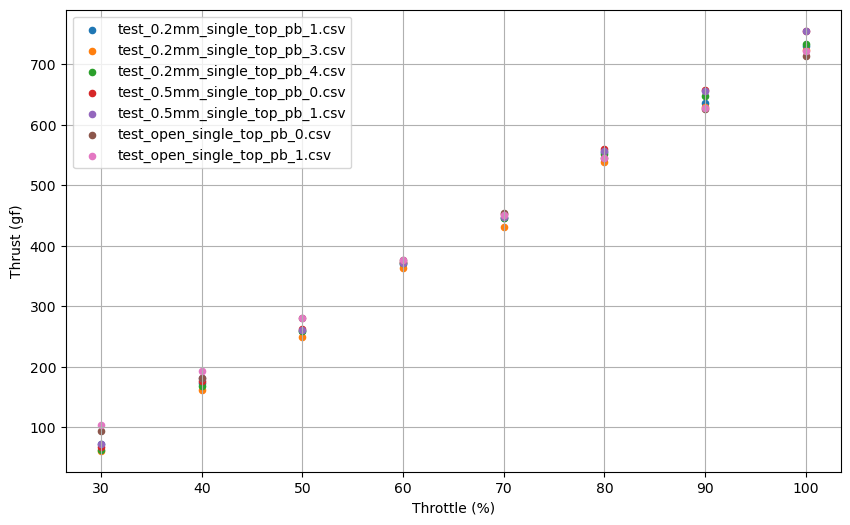

In [752]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", data=grp, label=n, s=20)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.legend()
plt.grid()
plt.show()

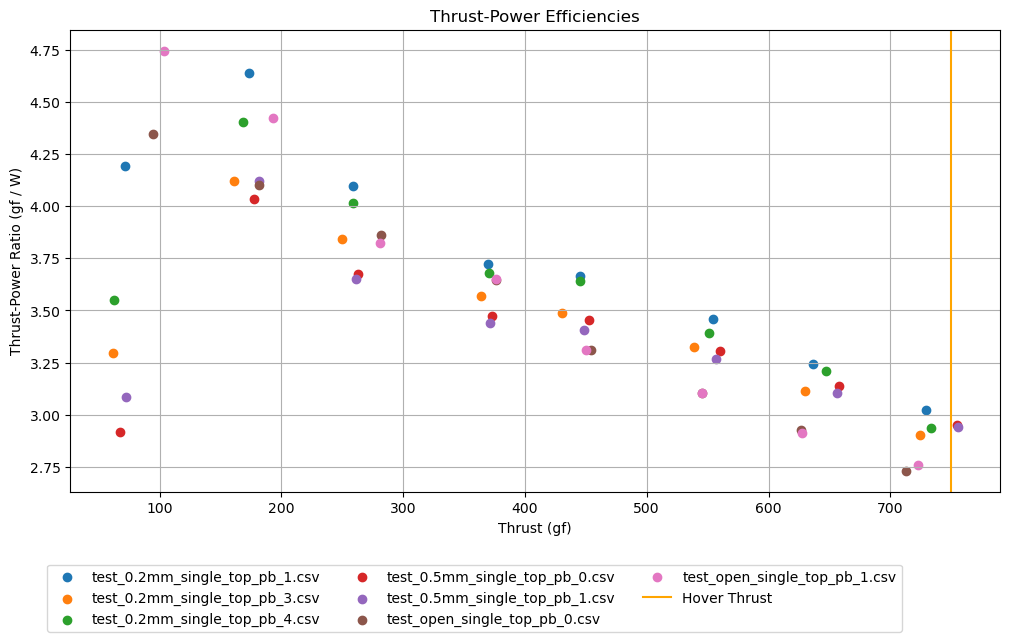

In [753]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

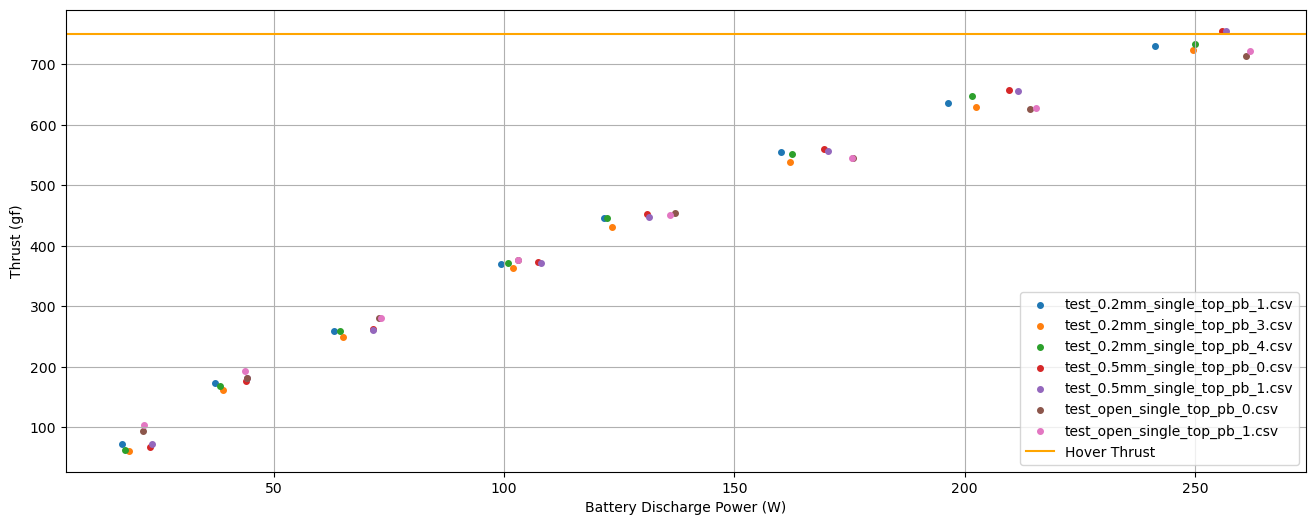

In [754]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="batt_power_mean", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

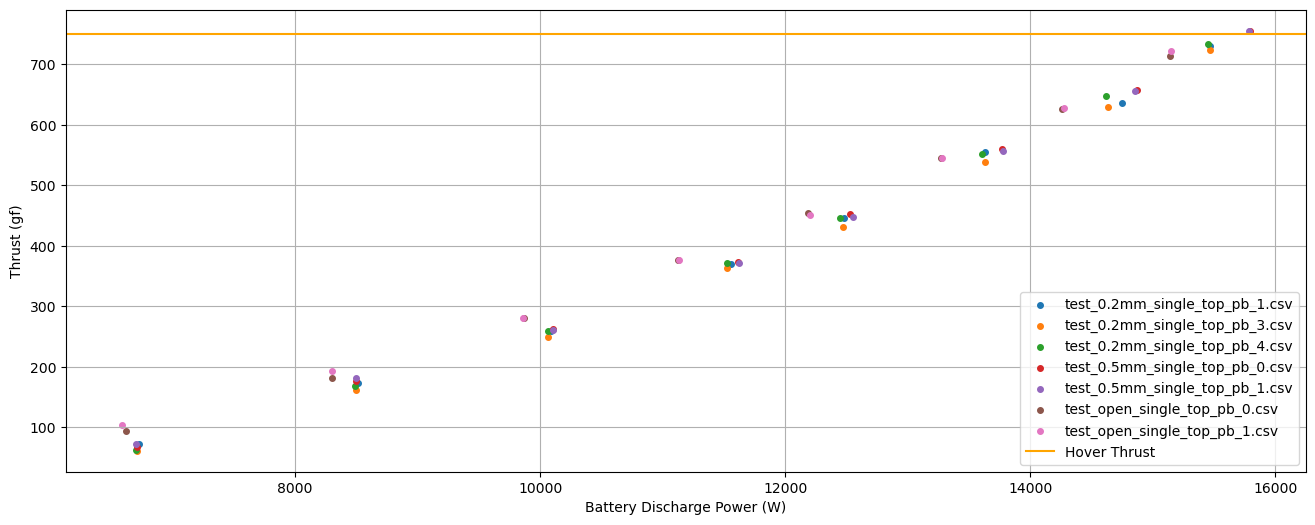

In [755]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="top_rpm", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

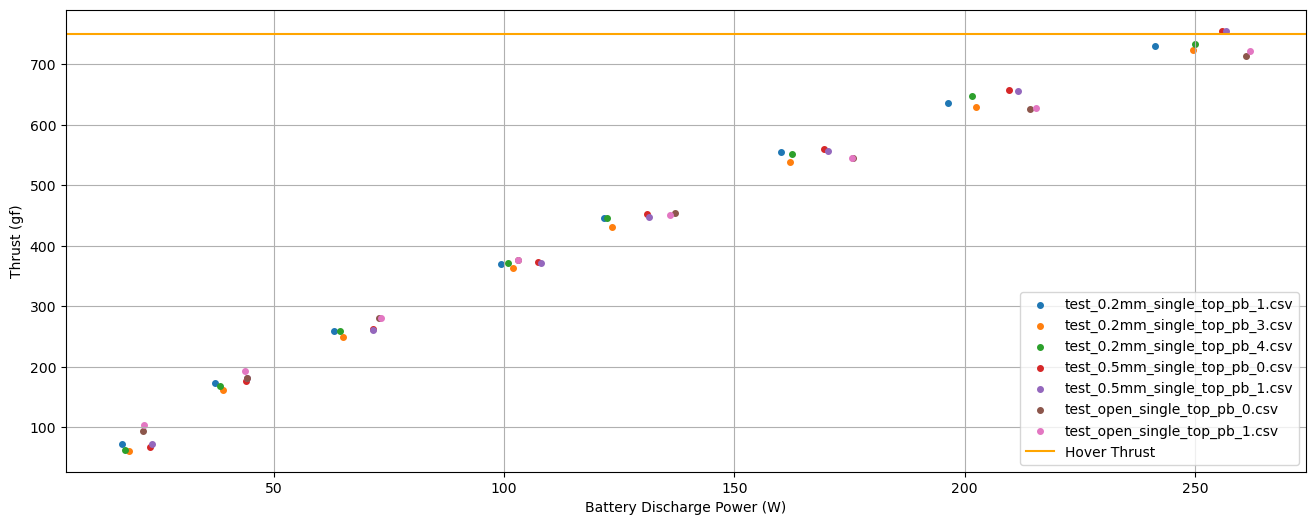

In [756]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="batt_power_mean", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

# My Stuff

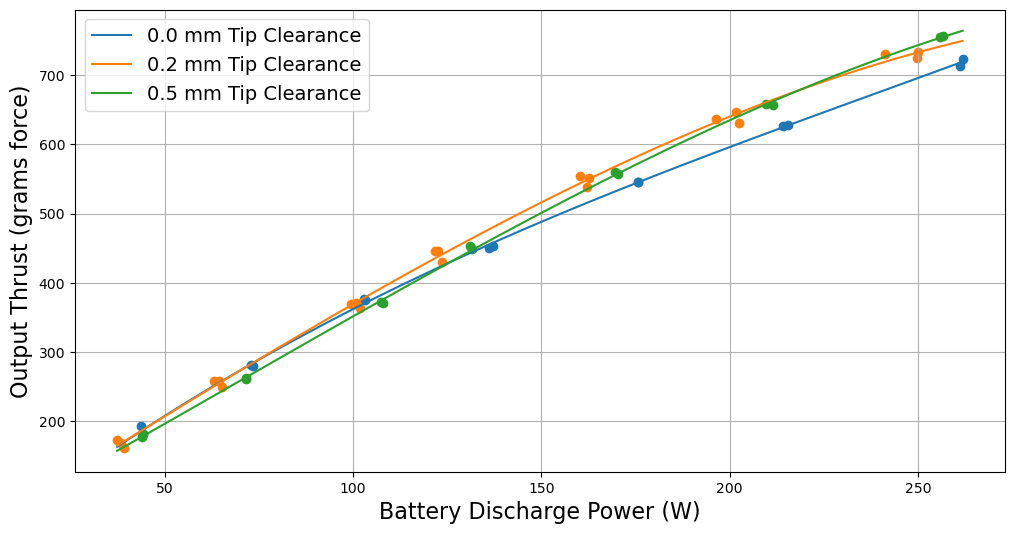

In [758]:
import numpy as np

DEGREE = 3
N = 100
min_thrust = hover_thrust_g - 600
max_thrust = payload_thrust_g + 200

x_label = "batt_power_mean"
y_label = "thrust_mean_g"
err_label = "batt_power_err"
x_min = 1e9
x_max = -1e9


def extract_roi(grp, x_label, ylabel, min_thrust, max_thrust):
    grp = grp[grp["thrust_mean_g"] > min_thrust]
    grp = grp.sort_values("thrust_mean_g")
    x = grp[x_label].to_numpy()
    y = grp[y_label].to_numpy()
    err = grp[err_label].to_numpy()
    return x, y, err


plt.figure(figsize=(12, 6))

# Analyze data.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    x_min = min(x_min, min(x))
    x_max = max(x_max, max(x))

x_dense = np.linspace(x_min, x_max, N)

# Plot inerpolation.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    coeffs = np.polyfit(x, y, DEGREE)
    poly = np.poly1d(coeffs)
    legend_label = str(n) + " mm Tip Clearance"
    if (n == 'Open Air'): legend_label = n

    plt.plot(x_dense, poly(x_dense), label=legend_label)
    plt.scatter(x, y)

plt.xlabel("Battery Discharge Power (W)", fontsize=16)
plt.ylabel("Output Thrust (grams force)", fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()